Import Libraries

In [25]:
import json
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [26]:
%pip install python-dotenv
from dotenv import load_dotenv
load_dotenv()

True

In [27]:
api_key= os.getenv('api_key')

In [81]:
#Get the weather api
api_k=api_key  #Get your API key from OpenweatherMap and store it in .env file
city = "Mumbai"
url= f"http://api.openweathermap.org/data/2.5/forecast?q={city}&cnt=240&appid={api_k}"

response = requests.get(url)


In [80]:
#Uncomment to see the JSON data
'''data = response.json()
json_str= json.dumps(data, indent=4)
print(json_str)'''

'data = response.json()\njson_str= json.dumps(data, indent=4)\nprint(json_str)'

Function to convert temp. from Kelvin to Celcius

In [30]:

def kelvin_to_celcius(temp_k):
  return temp_k - 273.15

In [31]:
if response.status_code == 200:
  data = response.json()
  weather_data = []
  for hour in data['list']:
    date_time= datetime.utcfromtimestamp(hour['dt']).strftime('%Y-%m-%d %H:%M:%S')
    temp = kelvin_to_celcius(hour['main']['temp'])
    feels_like = kelvin_to_celcius(hour['main']['feels_like'])
    pressure = hour['main']['pressure']
    humidity = hour['main']['humidity']
    weather_main = hour['weather'][0]['main']
    weather_description = hour['weather'][0]['description']
    wind_speed = hour['wind']['speed']
    wind_direction= hour['wind']['deg']
    cloudiness = hour['clouds']['all']
    rain_volume = hour.get('rain', {}).get('3h', 0)
    snow_volume = hour.get('snow', {}).get('3h', 0)

    weather_data.append({
      'DateTime': date_time,
      'Temperature': temp,
      'Feels Like_temp': feels_like,
      'Pressure(hpa)': pressure,
      'Humidity_percent': humidity,
      'Weather': weather_main,
      'Weather Description': weather_description,
      'Wind_speed(m/s)': wind_speed,
      'Wind_direction': wind_direction,
      'Cloudiness': cloudiness,
      'Rain_volume(mm)': rain_volume,
      'Snow_volume(mm)': snow_volume
    })

    df= pd.DataFrame(weather_data)
else:
  print('Error:', response.status_code)

df.head()



,DateTime,Temperature,Feels Like_temp,Pressure(hpa),Humidity_percent,Weather,Weather Description,Wind_speed(m/s),Wind_direction,Cloudiness,Rain_volume(mm),Snow_volume(mm)
0,2025-07-13 18:00:00,28.41,33.15,1006,80,Rain,light rain,6.78,229,83,1.44,0
1,2025-07-13 21:00:00,27.84,31.85,1005,81,Rain,light rain,6.88,234,92,1.57,0
2,2025-07-14 00:00:00,27.05,30.05,1004,82,Rain,light rain,7.10,236,100,1.56,0
3,2025-07-14 03:00:00,27.19,30.38,1006,82,Rain,light rain,6.95,245,100,2.37,0
4,2025-07-14 06:00:00,27.42,30.70,1006,80,Rain,light rain,6.00,235,100,1.87,0


In [32]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DateTime             40 non-null     object 
 1   Temperature          40 non-null     float64
 2   Feels Like_temp      40 non-null     float64
 3   Pressure(hpa)        40 non-null     int64  
 4   Humidity_percent     40 non-null     int64  
 5   Weather              40 non-null     object 
 6   Weather Description  40 non-null     object 
 7   Wind_speed(m/s)      40 non-null     float64
 8   Wind_direction       40 non-null     int64  
 9   Cloudiness           40 non-null     int64  
 10  Rain_volume(mm)      40 non-null     float64
 11  Snow_volume(mm)      40 non-null     int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 3.9+ KB


In [33]:
#Convert Datetime from object to Datetime
df['DateTime'] = pd.to_datetime(df['DateTime'])

#Extract day and hour from Datetime
df['Day']= df['DateTime'].dt.date
df['Hour']= df['DateTime'].dt.hour

#Pivot the DF
df_pivot= df.pivot(index='Day', columns='Hour', values='Temperature')

In [34]:
average_value= df['Temperature'].mean()

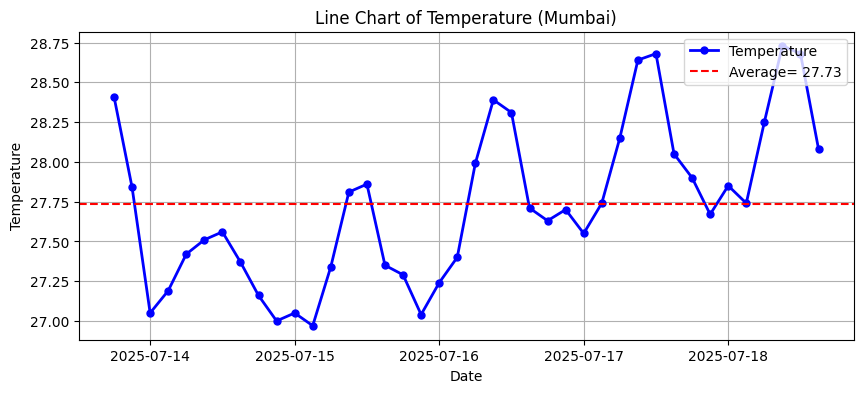

In [35]:
plt.figure(figsize=(10,4))
plt.plot(df['DateTime'], df['Temperature'], color='b', linestyle='-', linewidth=2, marker='o', markersize=5, label='Temperature')
plt.axhline(y=average_value, color='r', linestyle='--', label=f'Average= {average_value:.2f}')
plt.title('Line Chart of Temperature (Mumbai)')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend(loc= "upper right")
plt.grid(True)
plt.show()

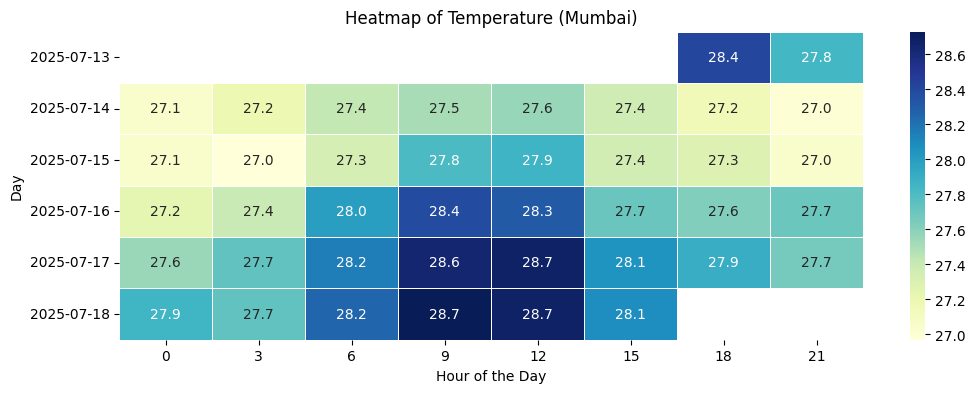

In [36]:
plt.figure(figsize=(12,4))
sns.heatmap(df_pivot, cmap='YlGnBu', annot= True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Temperature (Mumbai)')
plt.xlabel('Hour of the Day')
plt.ylabel('Day')
plt.show()

In [79]:
import sqlite3

# Save DataFrame to SQLite
conn = sqlite3.connect('weather_data.db')
df.to_sql('weather', conn, if_exists='replace', index=False)
print("✅ Weather data saved to SQLite DB")

✅ Weather data saved to SQLite DB
